In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pipeline import *
from vehicle_detection import VehicleDetectionPipeline

In [61]:
path = './data/full/*/*/*.png'

p = VehicleDetectionPipeline()

p.preprocess_data(path=path)

p.train()

pickle.dump(p.classifier, open('classifier-all-ycrcb.p','wb'))
pickle.dump(p.scaler, open('scaler-all-ycrcb.p','wb'))

In [7]:
import pickle

In [80]:
classifier = pickle.load(open('classifier.p','rb'))
scaler = pickle.load(open('scaler.p','rb'))

In [252]:
i=1

3 cars found


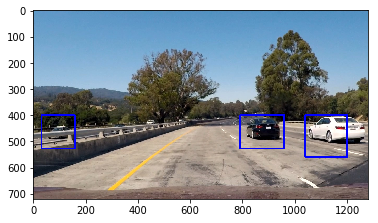

In [254]:
ip = ImageProcessor('./test_images/test{}.jpg'.format(i))
ip.run_find_cars(p.classifier, p.scaler)

3 cars found


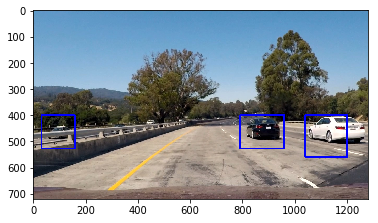

3 cars found
1 cars found


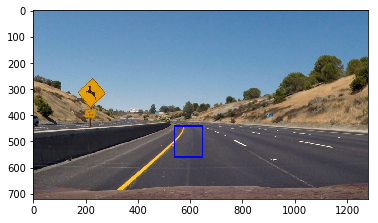

1 cars found
1 cars found


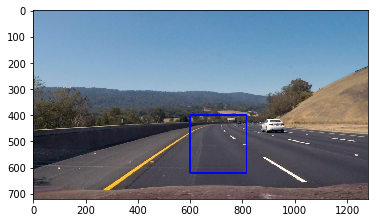

1 cars found
2 cars found


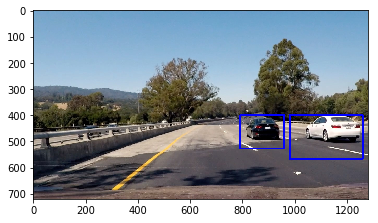

2 cars found
3 cars found


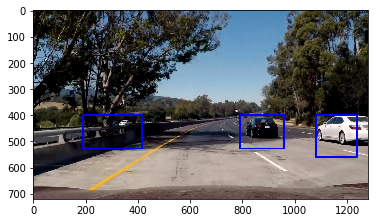

3 cars found
1 cars found


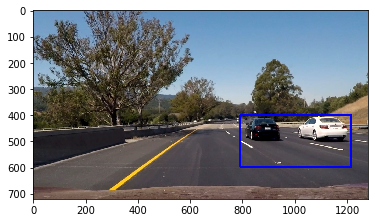

1 cars found
2 cars found


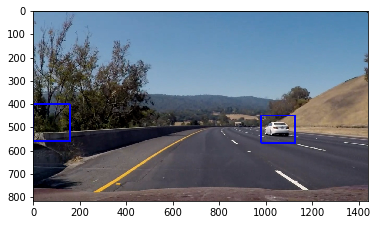

2 cars found
2 cars found


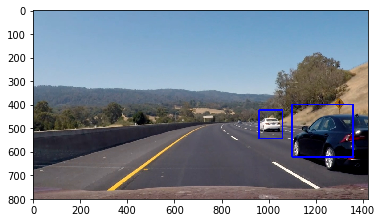

2 cars found
2 cars found


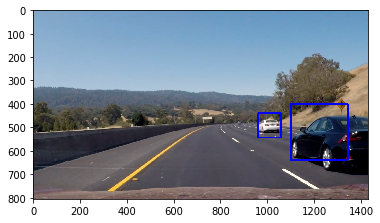

2 cars found
2 cars found


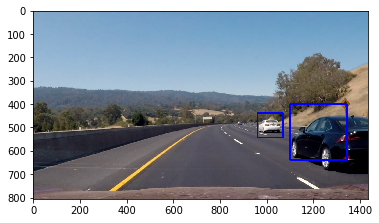

2 cars found
3 cars found


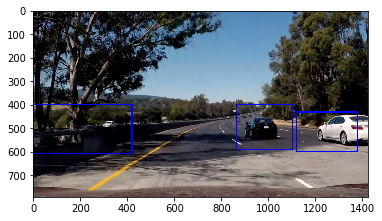

3 cars found


In [256]:
for i in range(1,12):
    ip = ImageProcessor('./test_images/test{}.jpg'.format(i))
    ip.run_find_cars(p.classifier, p.scaler)
    # ip.find_vehicles(p.classifier, p.scaler)

    ip.add_heat()
    ip.apply_threshold(4)

    from scipy.ndimage.measurements import label
    labels = label(ip.heat)
    print(labels[1], 'cars found')
    # plt.imshow(labels[0], cmap='gray')
    # plt.show()

    def draw_labeled_bboxes(img, labels):
        # Iterate through all detected cars
        for car_number in range(1, labels[1]+1):
            # Find pixels with each car_number label value
            nonzero = (labels[0] == car_number).nonzero()
            # Identify x and y values of those pixels
            nonzeroy = np.array(nonzero[0])
            nonzerox = np.array(nonzero[1])
            # Define a bounding box based on min/max x and y
            bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
            # Draw the box on the image
            cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
        # Return the image
        return img

    # Read in the last image above
    image = ip.image
    # Draw bounding boxes on a copy of the image
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    # Display the image
#     plt.imshow(draw_img)
#     plt.show()

    i+=1